In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
n = 500

In [51]:
x = np.linspace(0, 2*np.pi, n)
y_true = np.sin(3 * x)
y_pred = y_true + np.random.uniform(-0.5, 0.5, y_true.shape)

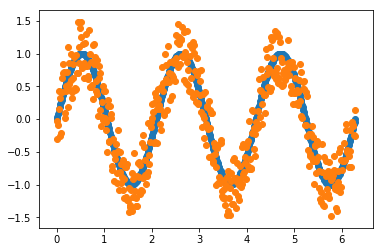

In [52]:
plt.scatter(x, y_true)
plt.scatter(x, y_pred);

In [61]:
def sse(y_true, y_pred): return np.sum((y_true - y_pred)**2)

In [62]:
def svar(y): return np.sum((y - np.mean(y))**2)

In [64]:
def r2(y_true, y_pred): return 1 - (sse(y_true, y_pred) / svar(y_true))

In [63]:
def old_r2(y_true, y_pred): return 1 - (mse(y_true, y_pred) / np.var(y_true, ddof=1))

In [67]:
# Compute global R2
r2(y_true, y_pred)

0.83851168578231861

In [68]:
old_r2(y_true, y_pred)

0.83883466241075388

In [56]:
rand_idxs = np.random.permutation(n)

In [69]:
def batch_r2(bs):
    batch_r2 = []
    for i in range(n // bs):
        idxs = rand_idxs[i*bs:(i+1)*bs]
        batch_r2.append(r2(y_true[idxs], y_pred[idxs]))
    return np.mean(batch_r2)

In [70]:
bs_list = [5, 10, 20, 50, 100, 500]

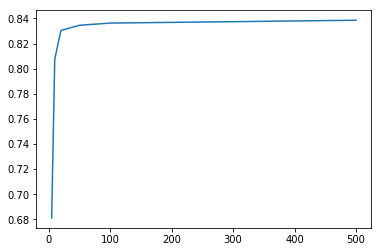

In [71]:
plt.plot(bs_list, [batch_r2(bs) for bs in bs_list])